<a href="https://colab.research.google.com/github/sisyamaliah/Sisy/blob/main/TGS_Machine_Learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-6 Hierarchical Clustering: Agglomerative Hierarchical Clustering (AHC)

## Import Library

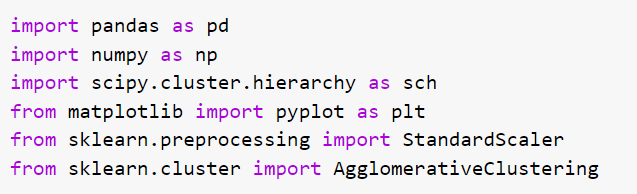

In [ ]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

## Load Dataset

Download dataset [di sini](https://drive.google.com/file/d/1kQhSkVx2BYYRHeGZtjjfgZTOMSf9YjhY/view?usp=sharing)

Pada hands-on kali ini, kita akan membuat customer segmentation dari dataset customer sebuah toko kredit di Mall.

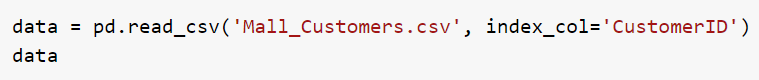

In [ ]:
data = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
data

,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
209,Female,35,1207,79
210,Female,45,126,182
211,Male,32,126,174


Memeriksa kelengkapan dataset.

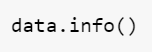

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 1 to 213
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         240 non-null    object
 1   Age            240 non-null    int64 
 2   AnnualIncome   240 non-null    int64 
 3   SpendingScore  240 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.4+ KB


Kita hanya memilih dua variable saja, yakni **AnnualIncome** dan SpendingScore.

> Note: Jika kita memilih variable Gender, maka kita perlu melakukan preprocessing terlebih dahulu.

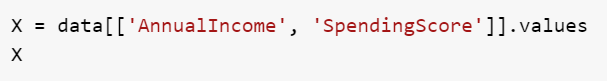

In [ ]:
X = data[['AnnualIncome', 'SpendingScore']].values
X

array([[  15,   39],
       [  15,   81],
       [  16,    6],
       [  16,   77],
       [  17,   40],
       [  17,   76],
       [  18,    6],
       [  18,   94],
       [  19,    3],
       [  19,   72],
       [  19,   14],
       [  19,   99],
       [  20,   15],
       [  20,   77],
       [  20,   13],
       [  20,   79],
       [  21,   35],
       [  21,   66],
       [  23,   29],
       [  23,   98],
       [  24,   35],
       [  24,   73],
       [  25,    5],
       [  25,   73],
       [  28,   14],
       [  28,   82],
       [  28,   32],
       [  28,   61],
       [  29,   31],
       [  29,   87],
       [  30,    4],
       [  30,   73],
       [  33,    4],
       [  33,   92],
       [  33,   14],
       [  33,   81],
       [  34,   17],
       [  34,   73],
       [  37,   26],
       [  37,   75],
       [  38,   35],
       [  38,   92],
       [  39,   36],
       [  39,   61],
       [  39,   28],
       [  39,   65],
       [  40,   55],
       [  40,

Karena standar besar/kecil di kedua variabel berbeda, maka kita perlu melakukan standarisasi terlebih dahulu menggunakan `StandardScaler`.

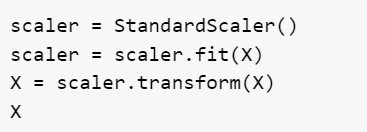

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)
X

array([[-4.31393298e-01, -4.21372977e-01],
       [-4.31393298e-01,  9.16824758e-01],
       [-4.24485019e-01, -1.47281405e+00],
       [-4.24485019e-01,  7.89377354e-01],
       [-4.17576739e-01, -3.89511126e-01],
       [-4.17576739e-01,  7.57515504e-01],
       [-4.10668459e-01, -1.47281405e+00],
       [-4.10668459e-01,  1.33102882e+00],
       [-4.03760179e-01, -1.56839961e+00],
       [-4.03760179e-01,  6.30068100e-01],
       [-4.03760179e-01, -1.21791925e+00],
       [-4.03760179e-01,  1.49033807e+00],
       [-3.96851899e-01, -1.18605740e+00],
       [-3.96851899e-01,  7.89377354e-01],
       [-3.96851899e-01, -1.24978110e+00],
       [-3.96851899e-01,  8.53101056e-01],
       [-3.89943619e-01, -5.48820381e-01],
       [-3.89943619e-01,  4.38896995e-01],
       [-3.76127059e-01, -7.39991486e-01],
       [-3.76127059e-01,  1.45847622e+00],
       [-3.69218779e-01, -5.48820381e-01],
       [-3.69218779e-01,  6.61929951e-01],
       [-3.62310499e-01, -1.50467591e+00],
       [-3.

---

## Membentuk Dendogram



Pilih metode complete linkage!

**FYI**, metode complete linkage bisa diubah dengan:
- single
- average

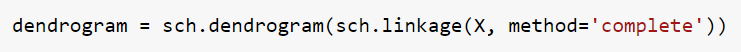

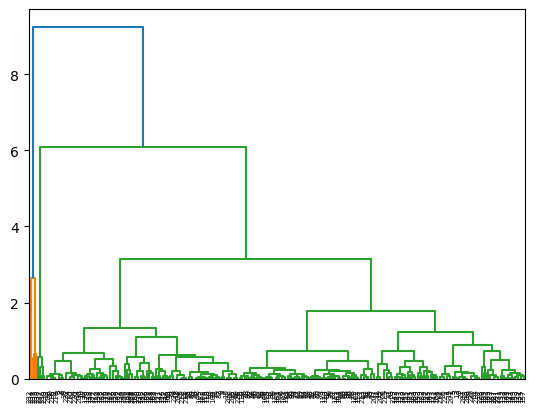

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

### Terlihat bahwa garis cluster terpanjang berada dijumlah cluster 2, 3, 4, atau 5.

---

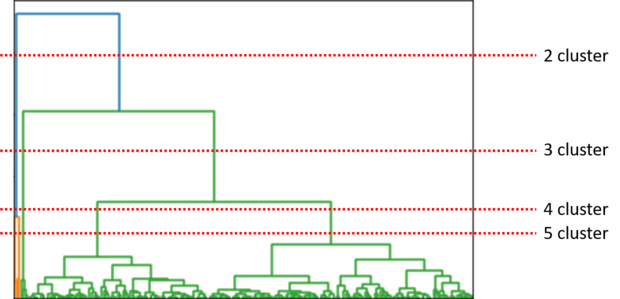

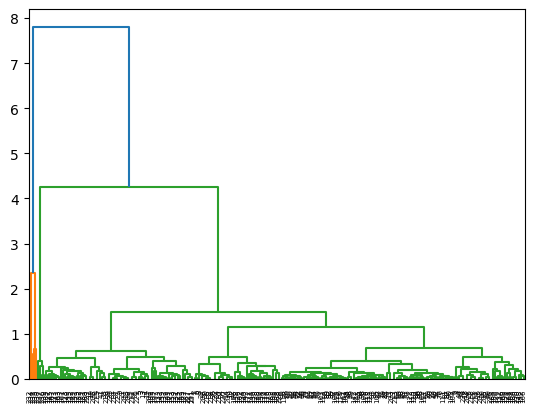

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))

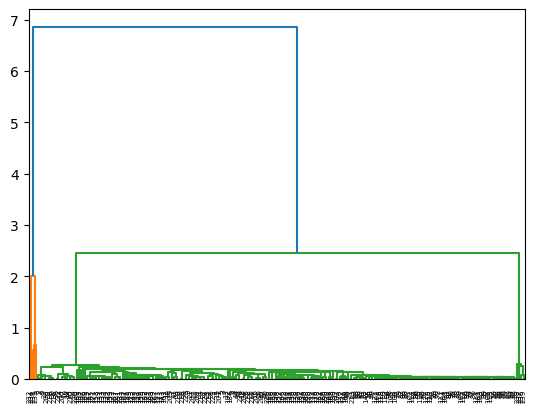

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))

## Modeling

Kita akan coba membuat model menggunakan algoritma Agglomerative Hierarchical Clustering (AHC) dengan:
- 4 cluster
- persamaan jarak menggunakan Euclidean Distance
- menggunakan metode complete linkage


Baca dokumentasi library AHC [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).

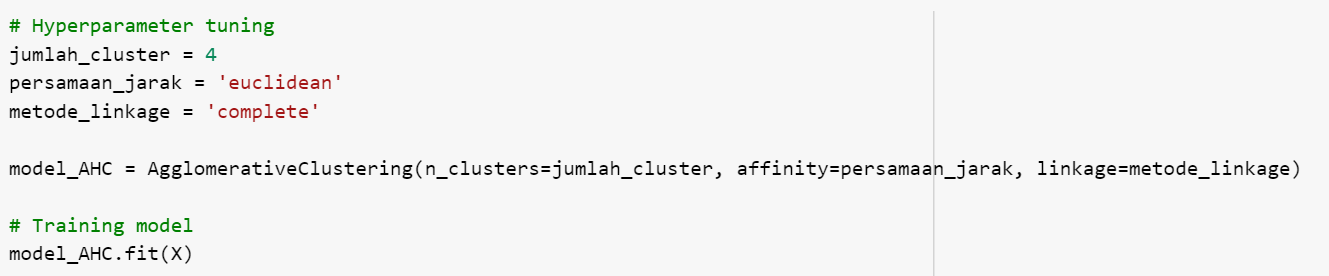

In [ ]:
# hyperparameter tuning
jumlah_cluster = 4
persamaan_jarak = 'euclidean'
metode_linkage = 'complete'

model_AHC = AgglomerativeClustering(n_clusters=jumlah_cluster, affinity=persamaan_jarak, linkage=metode_linkage)

# training model
model_AHC.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

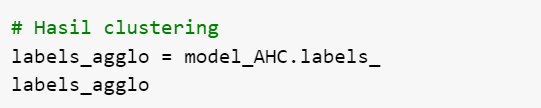

In [ ]:
# hasil clustering
labels_agglo = model_AHC.labels_
labels_agglo


array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1,
       1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 0, 0, 0, 2, 2, 2, 2])

## Visualisasi Hasil Clustering

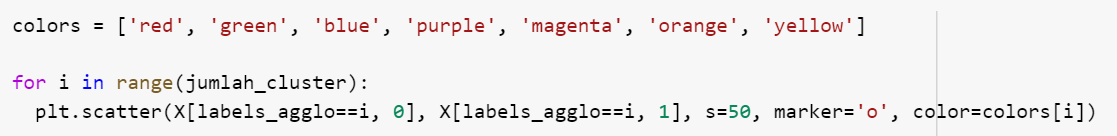

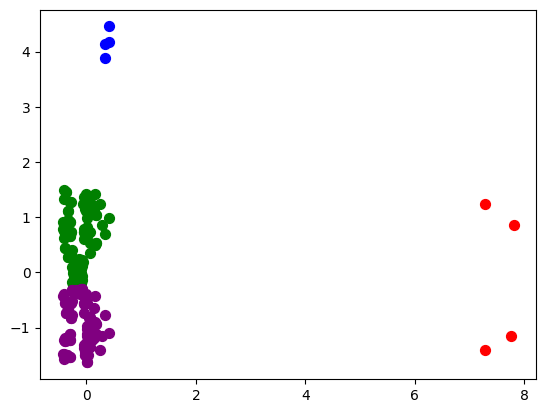

In [ ]:
colors = ['red', 'green', 'blue', 'purple', 'magenta', 'orange', 'yellow']

for i in range(jumlah_cluster):
  plt.scatter(X[labels_agglo==i, 0], X[labels_agglo==i, 1], s=50, marker='o', color=colors[i])

Kita bisa lihat hasil clusteringnya sudah bagus, terlihat antar cluster cukup terpisah (tidak ada misalnya anggota cluster warna biru berada di tengah2 warna hijau).

Artinya kita bisa menggunakan hasil clustering ini.

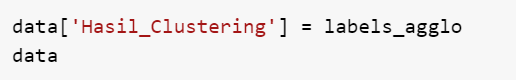

In [ ]:
data['Hasil_Clustering'] = labels_agglo
data

,Gender,Age,AnnualIncome,SpendingScore,Hasil_Clustering
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,1
3,Female,20,16,6,3
4,Female,23,16,77,1
5,Female,31,17,40,3
...,...,...,...,...,...
209,Female,35,1207,79,0
210,Female,45,126,182,2
211,Male,32,126,174,2


## Kesimpulan

**Contoh**:

Mencari rata-rata tiap cluster untuk menarik kesimpulan.

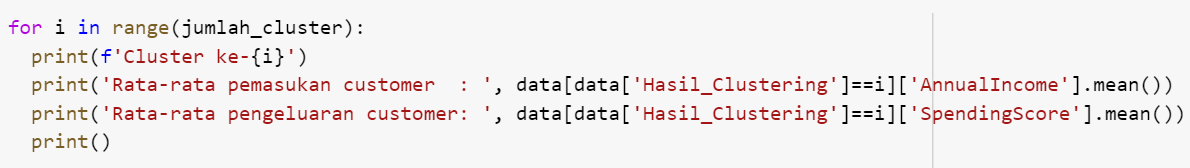

In [ ]:
for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata pemasukan customer :', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer :', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())

Cluster ke-0
Rata-rata pemasukan customer : 1167.0
Rata-rata pengeluaran customer : 48.5
Cluster ke-1
Rata-rata pemasukan customer : 57.268115942028984
Rata-rata pengeluaran customer : 67.94927536231884
Cluster ke-2
Rata-rata pemasukan customer : 131.5
Rata-rata pengeluaran customer : 182.75
Cluster ke-3
Rata-rata pemasukan customer : 58.40425531914894
Rata-rata pengeluaran customer : 23.74468085106383


Bisa kita simpulkan bahwa :
- Cluster 0 adalah kelompok customer sangat kaya dan sangat hemat (pengeluarannya sangat kecil)
- Cluster 1 adalah kelompok customer menengah ke bawah dan boros (pengeluaran lebih besar dari pemasukan)
- Cluster 3 adalah kelompok customer menengah ke atas dan boros (pengeluaran lebih besar dari pemasukan)
- Cluster 1 adalah kelompok customer menengah ke bawah dan hemat (pengeluaran lebih kecil dari pemasukan)

---

**OPEN DISCUSSION**

Jika kamu adalah pemilik toko kredit dan akan menawarkan kredit mobil, cluster manakah yang menurutmu tepat?



# Exercise (Latihan)

Boleh pilih salah satu activity atau lakukan keduanya.

## **Activity 1**



1. Coba kombinasi tuning hyperparameter AHC lainnya:
  - jumlah_cluster = 2, 3, 4, 5
  - persamaan_jarak = euclidean, manhattan
  - metode_linkage = single, complete, average

2. Tentukan kombinasi tuning hyperparameter terbaik (selain tuning hyperparameter pada hands-on ini)!

3. Buat kesimpulan clustering menggunakan hyperparameter terbaik!

# **Latihan Tuning Hyperparameter AHC lainnya**

### **Cluster (2)**

**Manhattan & Complete**

Cluster ke-0
Rata-rata pemasukan customer: 58.978813559322035
Rata-rata pengeluaran customer: 52.28813559322034
Cluster ke-1
Rata-rata pemasukan customer: 1167.0
Rata-rata pengeluaran customer: 48.5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


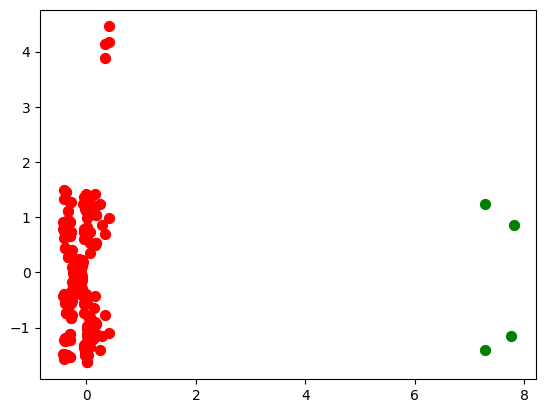

In [ ]:
# hyperparameter tuning manhattan & complete

jumlah_cluster = 2
persamaan_jarak = 'manhattan'
metode_linkage = 'complete'

model_AHC = AgglomerativeClustering(n_clusters=jumlah_cluster, affinity=persamaan_jarak, linkage=metode_linkage)

# training model
model_AHC.fit(X)
# hasil clustering
labels_agglo = model_AHC.labels_

colors = ['red', 'green', 'blue', 'purple', 'magenta', 'orange', 'yellow']

for i in range(jumlah_cluster):
  plt.scatter(X[labels_agglo==i, 0], X[labels_agglo==i, 1], s=50, marker='o', color=colors[i])

data['Hasil_Clustering'] = labels_agglo
data

for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata pemasukan customer:', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer:', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())



**Mahattan & Single**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster ke-0
Rata-rata pemasukan customer: 58.978813559322035
Rata-rata pengeluaran customer: 52.28813559322034
Cluster ke-1
Rata-rata pemasukan customer: 1167.0
Rata-rata pengeluaran customer: 48.5


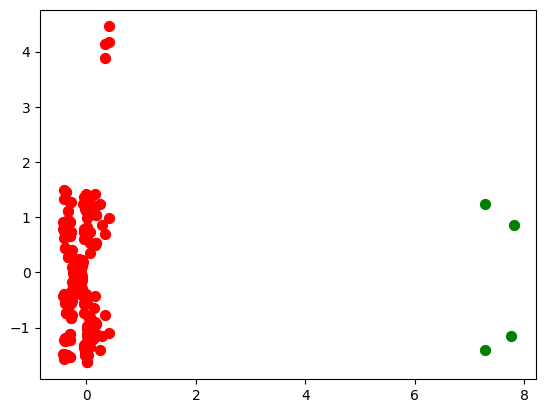

In [ ]:
# hyperparameter tuning manhattan & single

jumlah_cluster = 2
persamaan_jarak = 'manhattan'
metode_linkage = 'single'

model_AHC = AgglomerativeClustering(n_clusters=jumlah_cluster, affinity=persamaan_jarak, linkage=metode_linkage)

# training model
model_AHC.fit(X)
# hasil clustering
labels_agglo = model_AHC.labels_

colors = ['red', 'green', 'blue', 'purple', 'magenta', 'orange', 'yellow']

for i in range(jumlah_cluster):
  plt.scatter(X[labels_agglo==i, 0], X[labels_agglo==i, 1], s=50, marker='o', color=colors[i])

data['Hasil_Clustering'] = labels_agglo
data

for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata pemasukan customer:', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer:', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())



**Manhattan & Average**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster ke-0
Rata-rata pemasukan customer: 58.978813559322035
Rata-rata pengeluaran customer: 52.28813559322034
Cluster ke-1
Rata-rata pemasukan customer: 1167.0
Rata-rata pengeluaran customer: 48.5


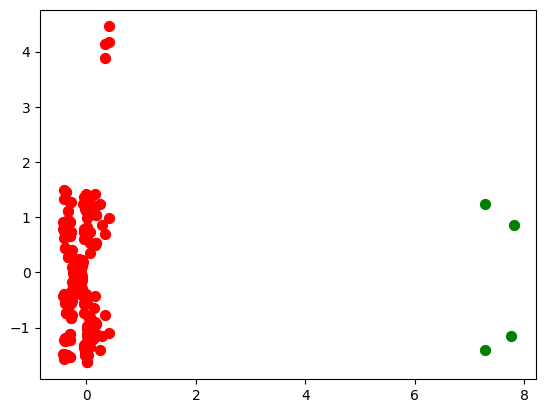

In [ ]:
# hyperparameter tuning manhattan & average

jumlah_cluster = 2
persamaan_jarak = 'manhattan'
metode_linkage = 'average'

model_AHC = AgglomerativeClustering(n_clusters=jumlah_cluster, affinity=persamaan_jarak, linkage=metode_linkage)

# training model
model_AHC.fit(X)
# hasil clustering
labels_agglo = model_AHC.labels_

colors = ['red', 'green', 'blue', 'purple', 'magenta', 'orange', 'yellow']

for i in range(jumlah_cluster):
  plt.scatter(X[labels_agglo==i, 0], X[labels_agglo==i, 1], s=50, marker='o', color=colors[i])

data['Hasil_Clustering'] = labels_agglo
data

for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata pemasukan customer:', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer:', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())



**Cluster (2)**

- Cluster ke-0  memiliki pengeluaran yang tinggi (yang lebih boros, dengan pemasukan lebih rendah dan pengeluaran yang cukup tinggi).

- Cluster ke-1 memiliki pemasukan lebih tinggi dan pengeluaran yang relatif rendah (customer yang hemat).

### **Cluster (3)**

**Manhattan & Complete**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster ke-0
Rata-rata pemasukan customer: 57.72844827586207
Rata-rata pengeluaran customer: 50.03879310344828
Cluster ke-1
Rata-rata pemasukan customer: 1167.0
Rata-rata pengeluaran customer: 48.5
Cluster ke-2
Rata-rata pemasukan customer: 131.5
Rata-rata pengeluaran customer: 182.75


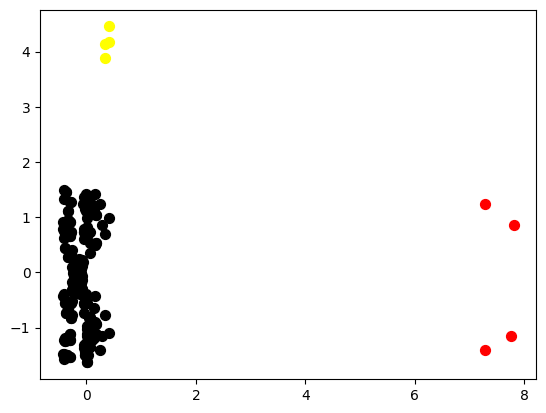

In [ ]:
# hyperparameter tuning manhattan & complete

jumlah_cluster = 3
persamaan_jarak = 'manhattan'
metode_linkage = 'complete'

model_AHC = AgglomerativeClustering(n_clusters=jumlah_cluster, affinity=persamaan_jarak, linkage=metode_linkage)

# training model
model_AHC.fit(X)
# hasil clustering
labels_agglo = model_AHC.labels_

colors = ['black', 'red', 'yellow', 'pink', 'magenta', 'black', 'yellow']

for i in range(jumlah_cluster):
  plt.scatter(X[labels_agglo==i, 0], X[labels_agglo==i, 1], s=50, marker='o', color=colors[i])

data['Hasil_Clustering'] = labels_agglo
data

for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata pemasukan customer:', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer:', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())



**Manhattan & Single**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster ke-0
Rata-rata pemasukan customer: 1167.0
Rata-rata pengeluaran customer: 48.5
Cluster ke-1
Rata-rata pemasukan customer: 131.5
Rata-rata pengeluaran customer: 182.75
Cluster ke-2
Rata-rata pemasukan customer: 57.72844827586207
Rata-rata pengeluaran customer: 50.03879310344828


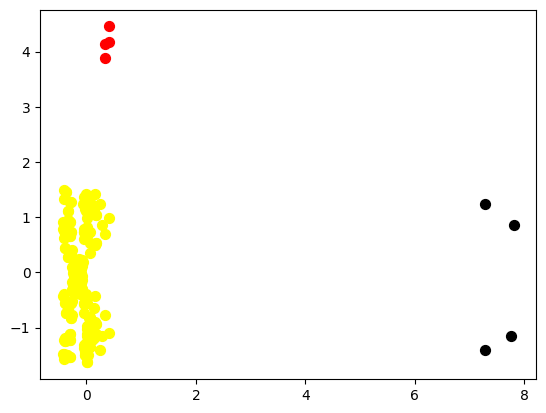

In [ ]:
# hyperparameter tuning manhattan & single

jumlah_cluster = 3
persamaan_jarak = 'manhattan'
metode_linkage = 'single'

model_AHC = AgglomerativeClustering(n_clusters=jumlah_cluster, affinity=persamaan_jarak, linkage=metode_linkage)

# training model
model_AHC.fit(X)
# hasil clustering
labels_agglo = model_AHC.labels_

colors = ['black', 'red', 'yellow', 'pink', 'magenta', 'black', 'yellow']

for i in range(jumlah_cluster):
  plt.scatter(X[labels_agglo==i, 0], X[labels_agglo==i, 1], s=50, marker='o', color=colors[i])

data['Hasil_Clustering'] = labels_agglo
data

for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata pemasukan customer:', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer:', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())



**Manhattan & Average**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster ke-0
Rata-rata pemasukan customer: 1167.0
Rata-rata pengeluaran customer: 48.5
Cluster ke-1
Rata-rata pemasukan customer: 57.72844827586207
Rata-rata pengeluaran customer: 50.03879310344828
Cluster ke-2
Rata-rata pemasukan customer: 131.5
Rata-rata pengeluaran customer: 182.75


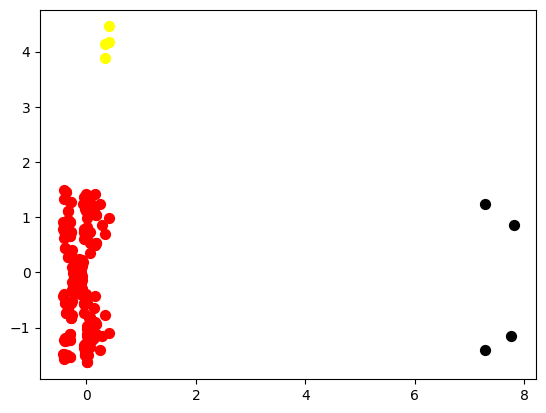

In [ ]:
# hyperparameter tuning manhattan & average

jumlah_cluster = 3
persamaan_jarak = 'manhattan'
metode_linkage = 'average'

model_AHC = AgglomerativeClustering(n_clusters=jumlah_cluster, affinity=persamaan_jarak, linkage=metode_linkage)

# training model
model_AHC.fit(X)
# hasil clustering
labels_agglo = model_AHC.labels_

colors = ['black', 'red', 'yellow', 'pink', 'magenta', 'black', 'yellow']

for i in range(jumlah_cluster):
  plt.scatter(X[labels_agglo==i, 0], X[labels_agglo==i, 1], s=50, marker='o', color=colors[i])

data['Hasil_Clustering'] = labels_agglo
data

for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata pemasukan customer:', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer:', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())



**Cluster (3)**

- Cluster ke-0 memiliki pemasukan yang tinggi dan pengeluaran yang rendah, (kaya" dan "hemat).
- Cluster ke-1 memiliki pemasukan dan pengeluaran yang rendah (menengah dan hemat).
- Cluster ke-2 memiliki pemasukan yang relatif rendah namun pengeluaran yang tinggi (menengah ke atas dan boros).

### **Cluster (4)**

**Manhattan & Complete**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster ke-0
Rata-rata pemasukan customer: 1167.0
Rata-rata pengeluaran customer: 48.5
Cluster ke-1
Rata-rata pemasukan customer: 55.73125
Rata-rata pengeluaran customer: 35.9
Cluster ke-2
Rata-rata pemasukan customer: 131.5
Rata-rata pengeluaran customer: 182.75
Cluster ke-3
Rata-rata pemasukan customer: 62.166666666666664
Rata-rata pengeluaran customer: 81.45833333333333


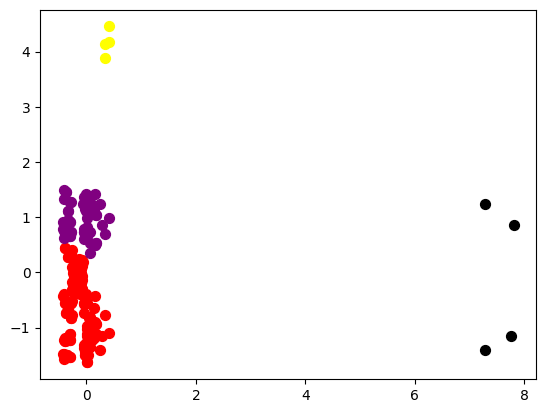

In [ ]:
# hyperparameter tuning manhattan & complete

jumlah_cluster = 4
persamaan_jarak = 'manhattan'
metode_linkage = 'complete'

model_AHC = AgglomerativeClustering(n_clusters=jumlah_cluster, affinity=persamaan_jarak, linkage=metode_linkage)

# training model
model_AHC.fit(X)
# hasil clustering
labels_agglo = model_AHC.labels_

colors = ['black', 'red', 'yellow', 'purple', 'magenta', 'black', 'blue']

for i in range(jumlah_cluster):
  plt.scatter(X[labels_agglo==i, 0], X[labels_agglo==i, 1], s=50, marker='o', color=colors[i])

data['Hasil_Clustering'] = labels_agglo
data

for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata pemasukan customer:', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer:', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())



**Manhattan & Single**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster ke-0
Rata-rata pemasukan customer: 1168.5
Rata-rata pengeluaran customer: 85.0
Cluster ke-1
Rata-rata pemasukan customer: 1165.5
Rata-rata pengeluaran customer: 12.0
Cluster ke-2
Rata-rata pemasukan customer: 57.72844827586207
Rata-rata pengeluaran customer: 50.03879310344828
Cluster ke-3
Rata-rata pemasukan customer: 131.5
Rata-rata pengeluaran customer: 182.75


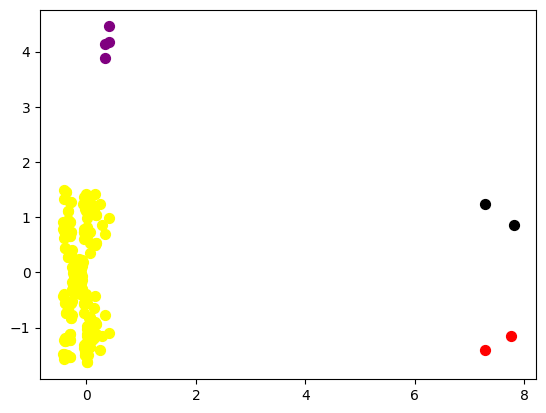

In [ ]:
# hyperparameter tuning manhattan & single

jumlah_cluster = 4
persamaan_jarak = 'manhattan'
metode_linkage = 'single'

model_AHC = AgglomerativeClustering(n_clusters=jumlah_cluster, affinity=persamaan_jarak, linkage=metode_linkage)

# training model
model_AHC.fit(X)
# hasil clustering
labels_agglo = model_AHC.labels_

colors = ['black', 'red', 'yellow', 'purple', 'magenta', 'black', 'blue']

for i in range(jumlah_cluster):
  plt.scatter(X[labels_agglo==i, 0], X[labels_agglo==i, 1], s=50, marker='o', color=colors[i])

data['Hasil_Clustering'] = labels_agglo
data

for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata pemasukan customer:', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer:', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())



**Manhattan & Average**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster ke-0
Rata-rata pemasukan customer: 57.72844827586207
Rata-rata pengeluaran customer: 50.03879310344828
Cluster ke-1
Rata-rata pemasukan customer: 1168.5
Rata-rata pengeluaran customer: 85.0
Cluster ke-2
Rata-rata pemasukan customer: 131.5
Rata-rata pengeluaran customer: 182.75
Cluster ke-3
Rata-rata pemasukan customer: 1165.5
Rata-rata pengeluaran customer: 12.0


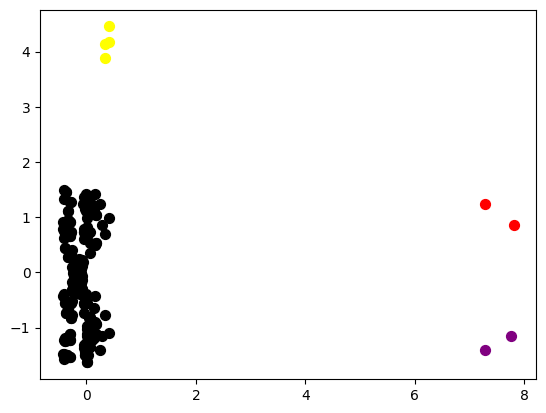

In [ ]:
# hyperparameter tuning manhattan & average

jumlah_cluster = 4
persamaan_jarak = 'manhattan'
metode_linkage = 'average'

model_AHC = AgglomerativeClustering(n_clusters=jumlah_cluster, affinity=persamaan_jarak, linkage=metode_linkage)

# training model
model_AHC.fit(X)
# hasil clustering
labels_agglo = model_AHC.labels_

colors = ['black', 'red', 'yellow', 'purple', 'magenta', 'black', 'blue']

for i in range(jumlah_cluster):
  plt.scatter(X[labels_agglo==i, 0], X[labels_agglo==i, 1], s=50, marker='o', color=colors[i])

data['Hasil_Clustering'] = labels_agglo
data

for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata pemasukan customer:', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer:', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())



**Cluster (4)**

- Cluster ke-0 memiliki pemasukan dan pengeluaran yang relatif rendah (menengah ke atas dan hemat)
- Cluster ke-1 pemasukan yang tinggi namun pengeluaran yang relatif rendah (hemat)
- Cluster ke-2 memiliki pemasukan dan pengeluaran yang tinggi (kaya dan boros)
- Cluster ke-3 memiliki  pemasukan yang tinggi namun pengeluaran yang rendah./(kaya hemat).

### **Cluster (5)**

**Manhattan & Complete**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster ke-0
Rata-rata pemasukan customer: 55.73125
Rata-rata pengeluaran customer: 35.9
Cluster ke-1
Rata-rata pemasukan customer: 62.166666666666664
Rata-rata pengeluaran customer: 81.45833333333333
Cluster ke-2
Rata-rata pemasukan customer: 131.5
Rata-rata pengeluaran customer: 182.75
Cluster ke-3
Rata-rata pemasukan customer: 1168.5
Rata-rata pengeluaran customer: 85.0
Cluster ke-4
Rata-rata pemasukan customer: 1165.5
Rata-rata pengeluaran customer: 12.0


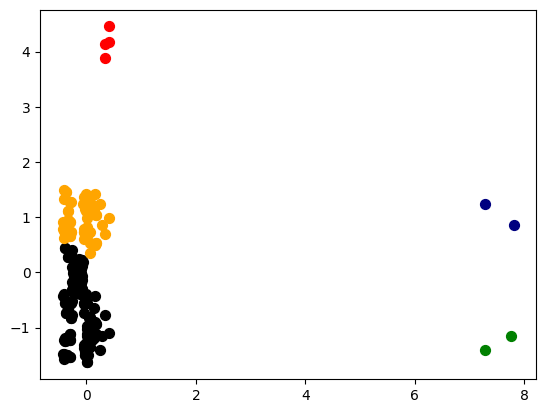

In [ ]:
# hyperparameter tuning manhattan & complete

jumlah_cluster = 5
persamaan_jarak = 'manhattan'
metode_linkage = 'complete'

model_AHC = AgglomerativeClustering(n_clusters=jumlah_cluster, affinity=persamaan_jarak, linkage=metode_linkage)

# training model
model_AHC.fit(X)
# hasil clustering
labels_agglo = model_AHC.labels_

colors = ['black', 'orange', 'red', 'navy', 'green', 'brown', 'blue']

for i in range(jumlah_cluster):
  plt.scatter(X[labels_agglo==i, 0], X[labels_agglo==i, 1], s=50, marker='o', color=colors[i])

data['Hasil_Clustering'] = labels_agglo
data

for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata pemasukan customer:', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer:', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())

**Manhattan & Single**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster ke-0
Rata-rata pemasukan customer: 1165.5
Rata-rata pengeluaran customer: 12.0
Cluster ke-1
Rata-rata pemasukan customer: 131.5
Rata-rata pengeluaran customer: 182.75
Cluster ke-2
Rata-rata pemasukan customer: 57.72844827586207
Rata-rata pengeluaran customer: 50.03879310344828
Cluster ke-3
Rata-rata pemasukan customer: 1130.0
Rata-rata pengeluaran customer: 91.0
Cluster ke-4
Rata-rata pemasukan customer: 1207.0
Rata-rata pengeluaran customer: 79.0


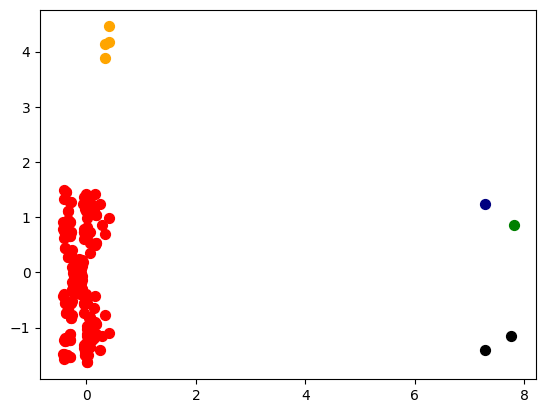

In [ ]:
# hyperparameter tuning manhattan & single

jumlah_cluster = 5
persamaan_jarak = 'manhattan'
metode_linkage = 'single'

model_AHC = AgglomerativeClustering(n_clusters=jumlah_cluster, affinity=persamaan_jarak, linkage=metode_linkage)

# training model
model_AHC.fit(X)
# hasil clustering
labels_agglo = model_AHC.labels_

colors = ['black', 'orange', 'red', 'navy', 'green', 'brown', 'blue']

for i in range(jumlah_cluster):
  plt.scatter(X[labels_agglo==i, 0], X[labels_agglo==i, 1], s=50, marker='o', color=colors[i])

data['Hasil_Clustering'] = labels_agglo
data

for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata pemasukan customer:', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer:', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())



**Manhattan & Average**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster ke-0
Rata-rata pemasukan customer: 56.28025477707006
Rata-rata pengeluaran customer: 35.3312101910828
Cluster ke-1
Rata-rata pemasukan customer: 1168.5
Rata-rata pengeluaran customer: 85.0
Cluster ke-2
Rata-rata pemasukan customer: 131.5
Rata-rata pengeluaran customer: 182.75
Cluster ke-3
Rata-rata pemasukan customer: 1165.5
Rata-rata pengeluaran customer: 12.0
Cluster ke-4
Rata-rata pemasukan customer: 60.76
Rata-rata pengeluaran customer: 80.82666666666667


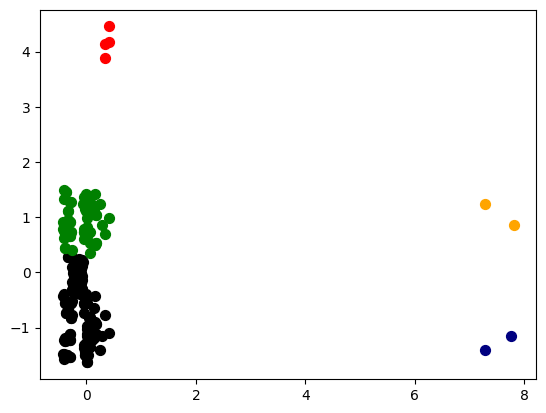

In [ ]:
# hyperparameter tuning manhattan & average

jumlah_cluster = 5
persamaan_jarak = 'manhattan'
metode_linkage = 'average'

model_AHC = AgglomerativeClustering(n_clusters=jumlah_cluster, affinity=persamaan_jarak, linkage=metode_linkage)

# training model
model_AHC.fit(X)
# hasil clustering
labels_agglo = model_AHC.labels_

colors = ['black', 'orange', 'red', 'navy', 'green', 'brown', 'blue']

for i in range(jumlah_cluster):
  plt.scatter(X[labels_agglo==i, 0], X[labels_agglo==i, 1], s=50, marker='o', color=colors[i])

data['Hasil_Clustering'] = labels_agglo
data

for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata pemasukan customer:', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer:', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())

**Cluster** (5)

- Cluster ke-1 dan ke-2 memiliki pengeluaran yang tinggi (yang paling boros, pemasukan dan pengeluaran yang relatif tinggi).

- Cluster ke-3 memiliki pemasukan terbanyak (customer sangat kaya, pemasukan yang tinggi),

- Cluster ke-4 dan ke-0 adalah customer menengah dan hemat (pengeluaran lebih rendah dari pemasukan)


## **Kesimpulan**




berdasarkan hasil clustering di atas, dapat disimpulkan:

- **Cluster Paling Hemat**:

Cluster ke-0:
Rata-rata pemasukan customer: 57.72844827586207
Rata-rata pengeluaran customer: 50.03879310344828

- **Cluster Paling Boros**:

Cluster ke-2:
Rata-rata pemasukan customer: 131.5
Rata-rata pengeluaran customer: 182.75

- **Cluster Paling Kaya**:

Cluster ke-3:
Rata-rata pemasukan customer: 1165.5
Rata-rata pengeluaran customer: 12.0

- **Cluster Menengah (Kaya & Hemat)**:

Cluster ke-1:
Rata-rata pemasukan customer: 1168.5
Rata-rata pengeluaran customer: 85.0

# **-------------------------------------------**

## **Activity 2-Tugas Kelompok**


**1. Buat kelompok**

**2. Carilah dataset untuk kasus clustering di sekitarmu atau di internet**

**3. Lakukan clustering menggunakan algortima AHC (ikuti step pada hands-on ini)**

**4. Buat kesimpulan clustering**

**5. Kumpulkan ke HC**

# **AHC: Country Data Clustering**

## **Import Library & Load Dataset**

In [ ]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [ ]:
data=pd.read_csv('Country-data.csv')
df=pd.DataFrame(data)
print(df.head)

<bound method NDFrame.head of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5

In [ ]:
df = pd.DataFrame(data)
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
X = data[['imports', 'exports']].values
X

array([[4.49e+01, 1.00e+01],
       [4.86e+01, 2.80e+01],
       [3.14e+01, 3.84e+01],
       [4.29e+01, 6.23e+01],
       [5.89e+01, 4.55e+01],
       [1.60e+01, 1.89e+01],
       [4.53e+01, 2.08e+01],
       [2.09e+01, 1.98e+01],
       [4.78e+01, 5.13e+01],
       [2.07e+01, 5.43e+01],
       [4.37e+01, 3.50e+01],
       [5.09e+01, 6.95e+01],
       [2.18e+01, 1.60e+01],
       [4.87e+01, 3.95e+01],
       [6.45e+01, 5.14e+01],
       [7.47e+01, 7.64e+01],
       [5.75e+01, 5.82e+01],
       [3.72e+01, 2.38e+01],
       [7.07e+01, 4.25e+01],
       [3.43e+01, 4.12e+01],
       [5.13e+01, 2.97e+01],
       [5.13e+01, 4.36e+01],
       [1.18e+01, 1.07e+01],
       [2.80e+01, 6.74e+01],
       [5.30e+01, 5.02e+01],
       [2.96e+01, 1.92e+01],
       [3.92e+01, 8.92e+00],
       [5.95e+01, 5.41e+01],
       [2.70e+01, 2.22e+01],
       [3.10e+01, 2.91e+01],
       [6.18e+01, 3.27e+01],
       [2.65e+01, 1.18e+01],
       [4.35e+01, 3.68e+01],
       [3.13e+01, 3.77e+01],
       [2.26e+

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)
X

array([[-8.24549559e-02, -1.13827979e+00],
       [ 7.08366942e-02, -4.79658426e-01],
       [-6.41762328e-01, -9.91216387e-02],
       [-1.65315307e-01,  7.75381171e-01],
       [ 4.97567504e-01,  1.60667899e-01],
       [-1.27978703e+00, -8.12628115e-01],
       [-6.58828857e-02, -7.43106971e-01],
       [-1.07677917e+00, -7.79697047e-01],
       [ 3.76925537e-02,  3.72890338e-01],
       [-1.08506521e+00,  4.82660565e-01],
       [-1.32171167e-01, -2.23527896e-01],
       [ 1.66126098e-01,  1.03882972e+00],
       [-1.03949202e+00, -9.18739335e-01],
       [ 7.49797118e-02, -5.88725554e-02],
       [ 7.29576488e-01,  3.76549346e-01],
       [ 1.15216428e+00,  1.29130124e+00],
       [ 4.39565258e-01,  6.25361861e-01],
       [-4.01467309e-01, -6.33336744e-01],
       [ 9.86443578e-01,  5.08976717e-02],
       [-5.21614819e-01,  3.33057330e-03],
       [ 1.82698169e-01, -4.17455297e-01],
       [ 1.82698169e-01,  9.11467550e-02],
       [-1.45379377e+00, -1.11266674e+00],
       [-7.

## **Membuat Dendogram**

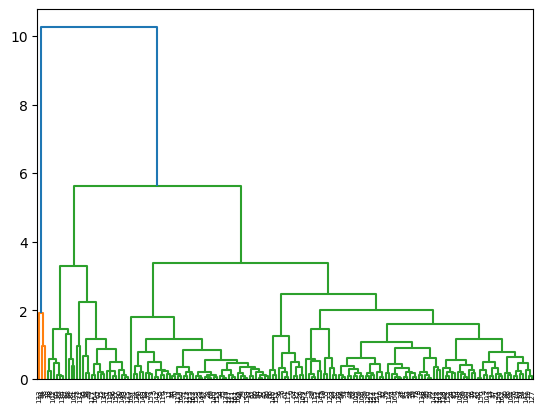

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))


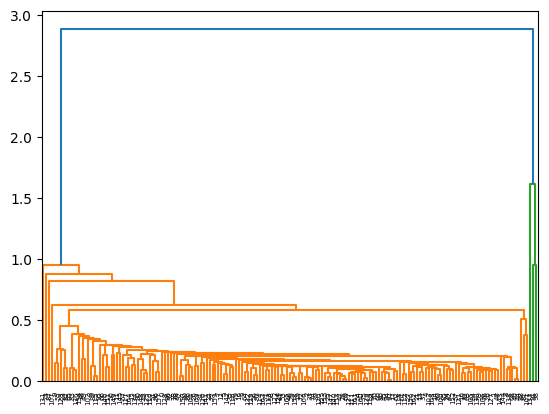

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))


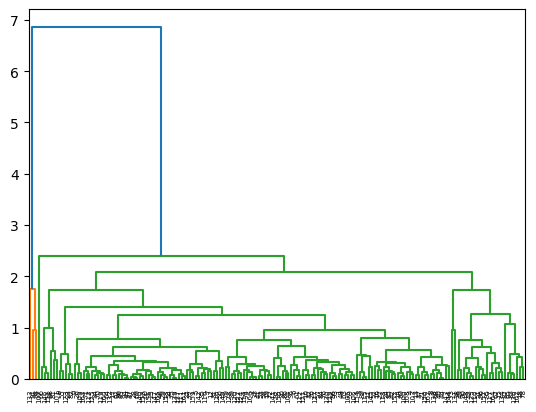

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))


## **Modeling**

Kita akan coba membuat model menggunakan algoritma Agglomerative Hierarchical Clustering (AHC) dengan:

- 3 cluster
- persamaan jarak menggunakan Euclidean Distance
- menggunakan metode single linkage


In [ ]:
# hyperparameter tuning
jumlah_cluster = 3
persamaan_jarak = 'euclidean'
metode_linkage = 'single'

model_AHC = AgglomerativeClustering(n_clusters=jumlah_cluster, affinity=persamaan_jarak, linkage=metode_linkage)

# training model
model_AHC.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='single', n_clusters=3)

In [ ]:
# hasil clustering
labels_agglo = model_AHC.labels_
labels_agglo


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## **Visualisasi Hasil Clustering**

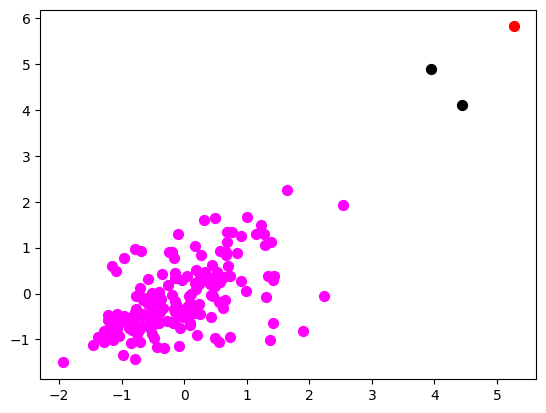

In [ ]:
colors = ['magenta', 'red', 'black', 'blue', 'green', 'grey', 'brown']

for i in range(jumlah_cluster):
  plt.scatter(X[labels_agglo==i, 0], X[labels_agglo==i, 1], s=50, marker='o', color=colors[i])


In [ ]:
data['Hasil_Clustering'] = labels_agglo
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hasil_Clustering
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


## **Kesimpulan**

In [ ]:
for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata Exports :', data[data['Hasil_Clustering']==i]['exports'].mean())
  print('Rata-rata Imports :', data[data['Hasil_Clustering']==i]['imports'].mean())

Cluster ke-0
Rata-rata Exports : 38.641457317073176
Rata-rata Imports : 44.88210914634146
Cluster ke-1
Rata-rata Exports : 200.0
Rata-rata Imports : 174.0
Cluster ke-2
Rata-rata Exports : 164.0
Rata-rata Imports : 148.0


terdapat tiga cluster yang diidentifikasi dengan rata-rata Exports dan Imports yang berbeda untuk setiap cluster.

- Cluster ke-0:

Rata-rata Exports: 38.641457317073176
Rata-rata Imports: 44.88210914634146

- Cluster ke-1:

Rata-rata Exports: 200.0
Rata-rata Imports: 174.0

-Cluster ke-2:

Rata-rata Exports: 164.0
Rata-rata Imports: 148.0

dari hasil clustering di atas, terdapat perbedaan yang signifikan antara rata-rata Exports dan Imports antara cluster-cluster tersebut. Cluster ke-1 memiliki nilai tertinggi untuk rata-rata Exports (200.0) dan Imports (174.0), sementara Cluster ke-0 memiliki nilai yang lebih rendah untuk kedua variabel tersebut. Cluster ke-2 memiliki nilai di antara Cluster ke-1 dan Cluster ke-0 untuk kedua variabel tersebut. perbedaan dalam tingkat eksport dan import antara setiap cluster dapat memberikan wawasan tentang pola dan tren dalam dataset country di atas.